In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.shape

(200, 5)

In [9]:
#extracting column 3 and 4
x=df.iloc[:,[3,4]].values

In [10]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [12]:
#to determine optimal value or number of cluster/K we apply elbow method
from sklearn.cluster import KMeans

#sum of squared distance between each point and centroid in a cluster [sum of squared distance with centroid]
ssdwc=[]

In [16]:
#we use loop to iterate kmean algo for our data from 1-11 since we assume that max clusters formed would not be more than 10
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    ssdwc.append(kmeans.inertia_)

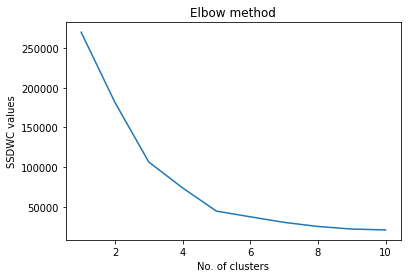

In [17]:
plt.plot(range(1,11),ssdwc)
plt.title("Elbow method")
plt.xlabel('No. of clusters')
plt.ylabel('SSDWC values')
plt.show()

In [18]:
#optimal no. of clusters =5
kmeansmodel = KMeans(n_clusters=5,init = 'k-means++', random_state=0)

In [19]:
y_kmeans = kmeansmodel.fit_predict(x)

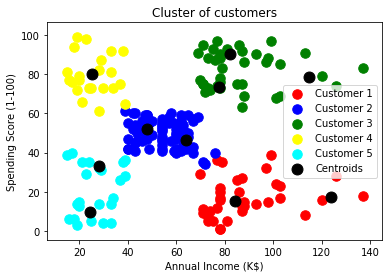

In [22]:
#plotting
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 90, c='red',label='Customer 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 90, c='blue',label='Customer 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 90, c='green',label='Customer 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s = 90, c='yellow',label='Customer 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s = 90, c='cyan',label='Customer 5')
#plotting centroid of clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=120,c='black',label='Centroids')
plt.title('Cluster of customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Conclusion is people from blue clusters are target audience as they have decent salary and their expenditure is quite well.